In [1]:
import pandas as pd
import helper_data_load as data_load
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Check data returned from data load function

In [2]:
data_norm_chum, data_norm_iucpq = data_load.get_norm_data(ecog=True)

223 patients with clinical and radiation data for CHUM.
192 patients with os, radiation, ecog and pdl1 data for CHUM.
164 patients with clinical and radiation data for IUCPQ.
128 patients with os, radiation, ecog and pdl1 data for IUCPQ.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.Categorical(df[col])
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].cat.codes
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [ ]:
feat_to_use+["pdl1_tps",	"ecog_status"]

In [9]:
col_comp = list(data_norm_chum.columns)
for feat in ["os_days",	"pdl1_tps",	"ecog_status"]:
    col_comp.remove(feat)
col_comp

['original_shape_Elongation',
 'original_shape_Flatness',
 'original_shape_LeastAxisLength',
 'original_shape_MajorAxisLength',
 'original_shape_Maximum2DDiameterColumn',
 'original_shape_Maximum2DDiameterRow',
 'original_shape_Maximum2DDiameterSlice',
 'original_shape_Maximum3DDiameter',
 'original_shape_MeshVolume',
 'original_shape_MinorAxisLength',
 'original_shape_Sphericity',
 'original_shape_SurfaceArea',
 'original_shape_SurfaceVolumeRatio',
 'original_shape_VoxelVolume',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Mean',
 'original_firstorder_Median',
 'original_firstorder_Minimum',
 'original_firstorder_Range',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared',
 'original

In [3]:
data_norm_chum.isnull().sum().sum()
data_norm_iucpq.isnull().sum().sum()

0

In [5]:
data_norm_chum["status"] = 1

# Histogram of os days distribution

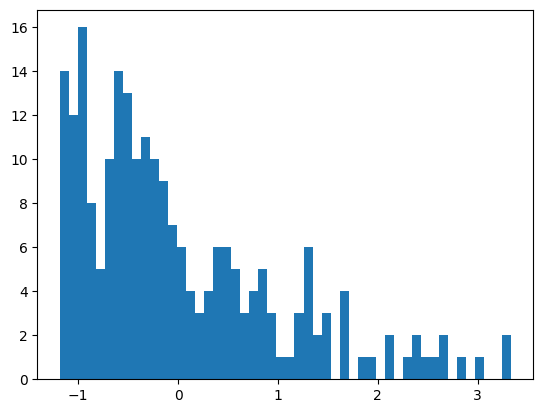

In [10]:
T = data_norm_chum["os_days"]
E = data_norm_chum["status"]
plt.hist(T, bins = 50)
plt.show()

# Kaplan Meier Fitter

-0.3202077474430601
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5               -0.426586               -0.160641


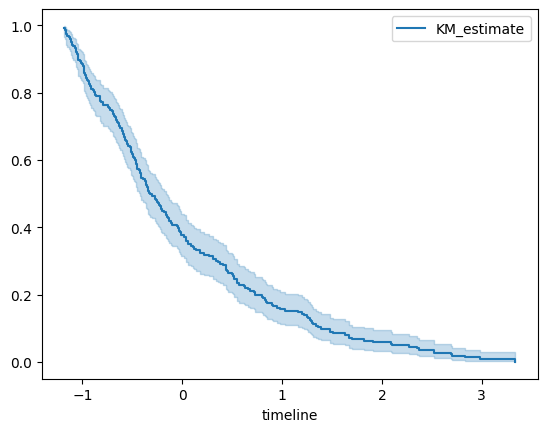

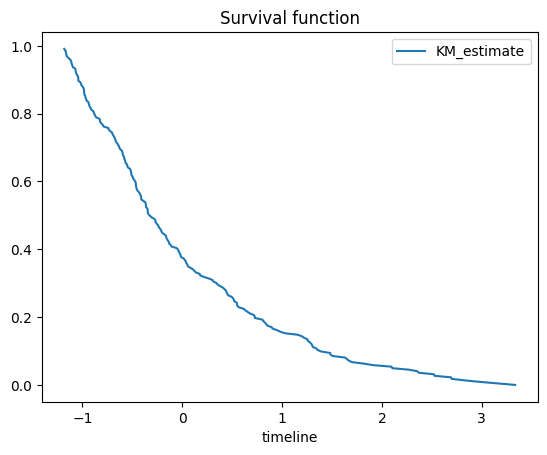

In [13]:
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()
kmf.survival_function_.plot()
plt.title('Survival function')

from lifelines.utils import median_survival_times
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

# Results from Valeria which were creates 1-50 and 50-100 features at a time - merge them here and save

In [17]:
def merge_1_50_to_50_100(feat_sel_method, nr_sol):
    # Imports
    result_discovery_chum_corr_1_49 = pd.read_csv("../../Data/Results/os_days_results_CHUM_discovery_"+feat_sel_method+str(nr_sol)+"_std_scl.csv", index_col=0)
    result_discovery_chum_corr_50_100 = pd.read_csv("../../Data/Results/os_days_results_CHUM_discovery_"+feat_sel_method+str(nr_sol)+"_std_scl_50-100.csv", index_col=0)
    result_discovery_iucpq_corr_1_49 = pd.read_csv("../../Data/Results/os_days_results_IUCPQ_discovery_"+feat_sel_method+str(nr_sol)+"_std_scl.csv", index_col=0)
    result_discovery_iucpq_corr_50_100 = pd.read_csv("../../Data/Results/os_days_results_IUCPQ_discovery_"+feat_sel_method+str(nr_sol)+"_std_scl_50-100.csv", index_col=0)
    # Concat
    result_discovery_iucpq_corr_1_100 = pd.concat([result_discovery_iucpq_corr_1_49, result_discovery_iucpq_corr_50_100])
    result_discovery_chum_corr_1_100 = pd.concat([result_discovery_chum_corr_1_49, result_discovery_chum_corr_50_100])
    # Save
    result_discovery_iucpq_corr_1_100.to_csv("../../Data/Results/os_days_results_IUCPQ_discovery_"+feat_sel_method+str(nr_sol)+"_std_scl_1-100.csv")
    result_discovery_chum_corr_1_100.to_csv("../../Data/Results/os_days_results_CHUM_discovery_"+feat_sel_method+str(nr_sol)+"_std_scl_1-100.csv")

In [18]:
# Select feature selection method
feat_sel_method = "mrmr"

if feat_sel_method == "mrmr":
    # if mrmr select to try how many solutions
    nr_sol_list = [1, 2, 3, 4]
else:
    nr_sol_list = [-1]

for nr_sol in nr_sol_list:
    merge_1_50_to_50_100(feat_sel_method=feat_sel_method, nr_sol=nr_sol)